### Idea/TO DO 
1. Could do predictive modelling to predict Your Ratings.

### Scaling Data and Principal Component Analysis.
1. Scale Data. (Done, converted all possible values to numeric, Dropped Title, REstore from Original DF)
2. Perform PCA
3. Cluster
4. Analzse Clusters.
5. Profit.

In [79]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns
sys.path.append("../tools/")
#from feature_format import featureFormat, targetFeatureSplit
pd.set_option('display.max_rows', 1000)

In [3]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

# Lets see if we can Find Clusters in my IMDB Ratings Dataset.

In [181]:
path = '/Users/apple/Desktop/DS/Datasets/imdb_ratings.csv'

import os
from pathlib import Path

In [182]:
print(Path.cwd())
print(Path.home())

/Users/apple/Desktop/DS/My_imdb_analysis_pd_plt_sns[EDA]
/Users/apple


In [183]:
data = pd.read_csv(path, engine='python', index_col=0)

In [184]:
data.describe(include='all')

,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
count,301.000000,301,301,301,301,301.000000,301.000000,301.000000,301,3.010000e+02,300,258
unique,NaN,126,301,301,6,NaN,NaN,NaN,145,NaN,290,203
top,NaN,2016-04-27,Shaadi Mein Zaroor Aana,https://www.imdb.com/title/tt1734110/,movie,NaN,NaN,NaN,"Comedy, Drama",NaN,2012-09-08,Christopher Nolan
freq,NaN,32,1,1,250,NaN,NaN,NaN,26,NaN,2,6
mean,7.996678,NaN,NaN,NaN,NaN,7.882060,116.229236,2008.328904,NaN,2.971019e+05,NaN,NaN
std,0.939852,NaN,NaN,NaN,NaN,0.696235,61.651688,12.819313,NaN,3.445646e+05,NaN,NaN
min,5.000000,NaN,NaN,NaN,NaN,5.600000,6.000000,1931.000000,NaN,3.300000e+01,NaN,NaN
25%,8.000000,NaN,NaN,NaN,NaN,7.500000,98.000000,2007.000000,NaN,4.267900e+04,NaN,NaN
50%,8.000000,NaN,NaN,NaN,NaN,7.900000,115.000000,2013.000000,NaN,1.852270e+05,NaN,NaN
75%,9.000000,NaN,NaN,NaN,NaN,8.300000,132.000000,2016.000000,NaN,4.329790e+05,NaN,NaN


#### Lets first filter only movies 

In [185]:
# create filter 

film_filt = (data['Title Type'] == 'movie')

# getting film data using loc indexer 
# syntax .loc[condition in form of df['']== , list of columns you want displayed]

data_film = data.loc[(film_filt)]

In [186]:
# 250 Movies 
data_film.describe()

,Your Rating,IMDb Rating,Runtime (mins),Year,Num Votes
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,7.896000,7.712400,122.052000,2007.660000,3.210570e+05
std,0.912422,0.588619,26.250135,13.661734,3.532972e+05
min,5.000000,5.600000,60.000000,1931.000000,3.300000e+01
25%,7.000000,7.400000,105.000000,2006.000000,4.887300e+04
50%,8.000000,7.800000,118.000000,2012.000000,2.224305e+05
75%,8.000000,8.100000,135.000000,2016.000000,4.596830e+05
max,10.000000,9.300000,321.000000,2018.000000,2.039088e+06


In [187]:
data_film[['Genre1','Genre2','Genre3','Genre4','Genre5','Genre6','Genre7']] = data_film.Genres.str.split(',', expand=True)
data_film.drop(['Genre2','Genre3', 'Genre4','Genre5','Genre6','Genre7'], axis= 1, inplace = True)
# Loss of info by dropping secondary, tertiary genres but will result in duplication, is complex.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [188]:
# Loss of info, Lee ukreich, ethan and joel coen etc are big loosers. Complex fix later.
data_film[['Director1','Director2','Director3', 'Director4']] = data_film.Directors.str.split(',', expand=True)
data_film.drop(['Director2','Director3', 'Director4'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [190]:
data_film.drop(['Genres', 'Directors'], axis = 1, inplace = True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


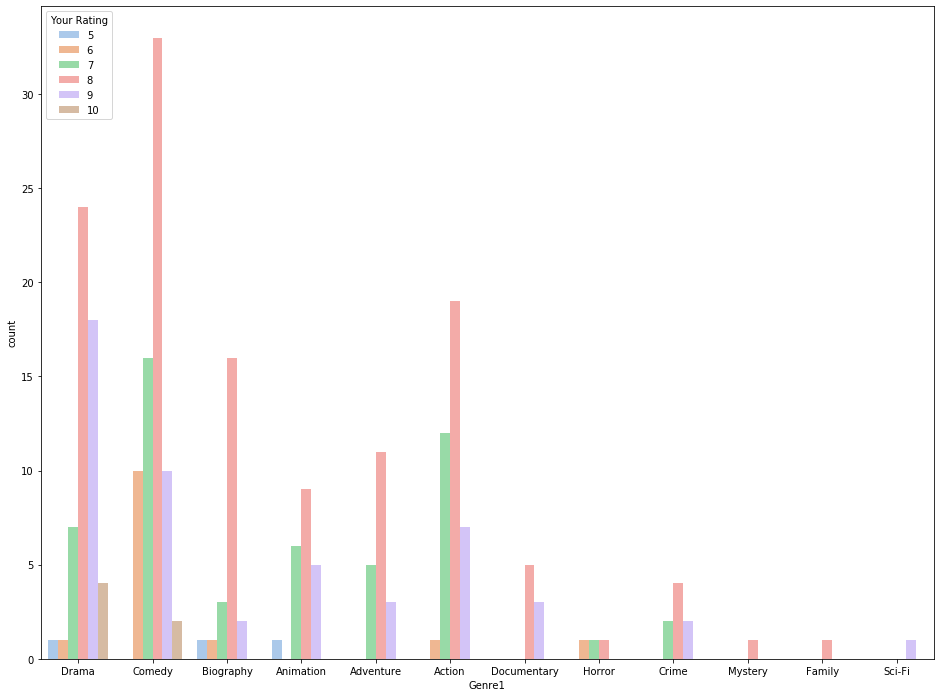

In [191]:
plt.figure(figsize=(16,12))
sns.countplot(x = 'Genre1', data = data_film, hue="Your Rating", palette="pastel")

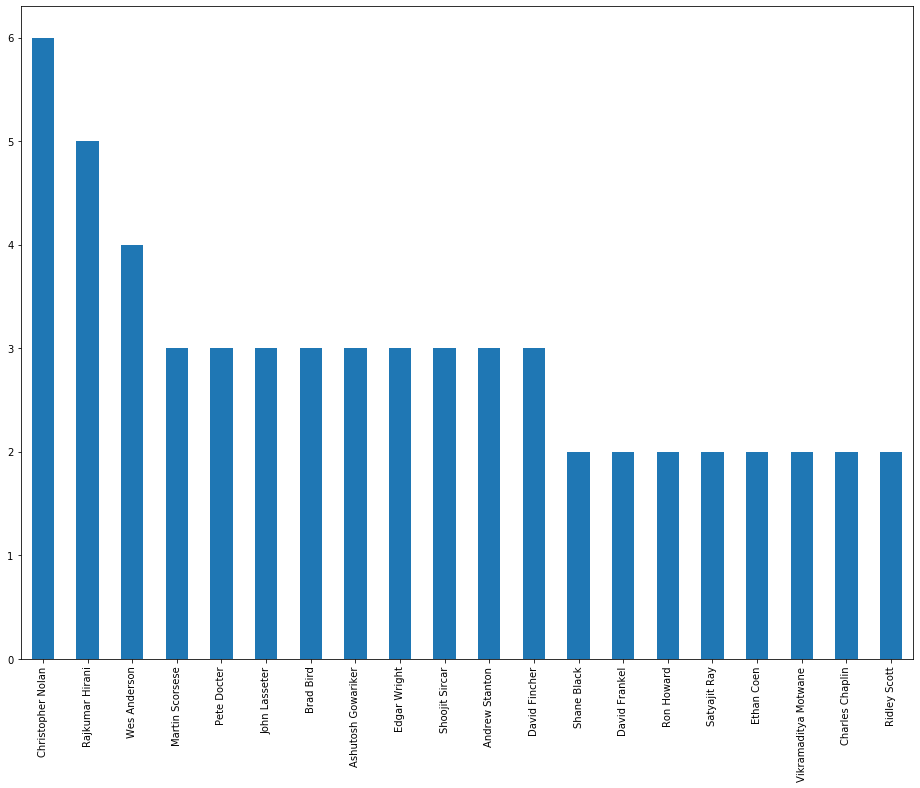

In [192]:
plt.figure(figsize = (16,12))
data_film.Director1.value_counts()[:20].plot(kind = 'bar')

### One - Hot encode Genre1

In [193]:
data_film = pd.get_dummies(data_film, prefix='Genre:', columns=['Genre1'])

In [194]:
data_film = pd.get_dummies(data_film, prefix='Director:', columns=['Director1'])

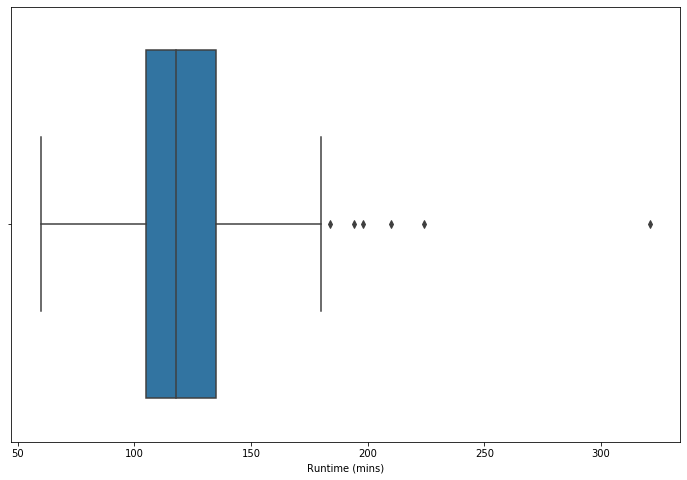

In [195]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Runtime (mins)', data = data_film)

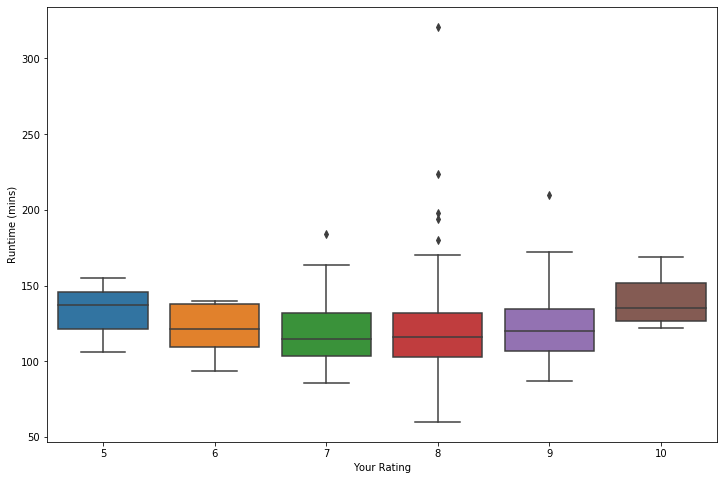

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Your Rating', y = 'Runtime (mins)', data = data_film)

#### Lets check if there is a linear relationship between my rating and runtime

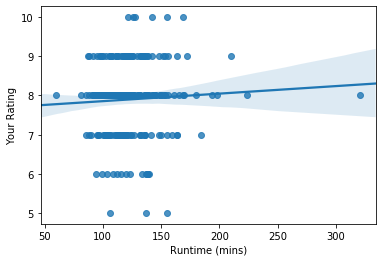

In [16]:
sns.regplot(y = 'Your Rating', x = 'Runtime (mins)', data = data_film)
# No SIgnificant Relationship

#### Lets check if there is a linear relationship between my rating and IMDB rating

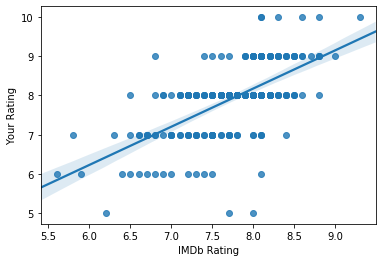

In [17]:
sns.regplot(y = 'Your Rating', x = 'IMDb Rating', data = data_film)
# Very strong Positive relationship. Not a hipster after all.

#### Lets check if there is a linear relationship between my rating and Year of films release.

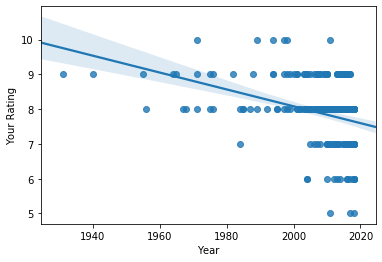

In [18]:
sns.regplot(y = 'Your Rating', x = 'Year', data = data_film)

#### Insight: I tend to rate older movies highly and newer movies worse.

#### Lets check if there is a linear relationship between my rating and The number of votes/Popularity.

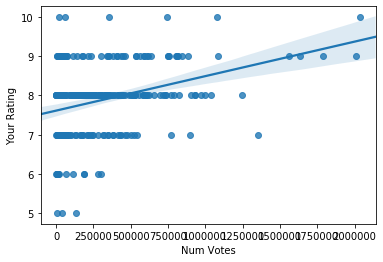

In [19]:
sns.regplot(y = 'Your Rating', x = 'Num Votes', data = data_film)

#### Insight: Popular movies tend to get rated higher, decent positive trend.

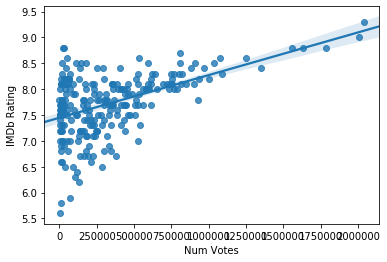

In [20]:
sns.regplot(y = 'IMDb Rating', x = 'Num Votes', data = data_film)

#### Getting Data for Clustering, Need a feature vector (starting with two simple Feature)
#### 1. Clustering Based on runtime and runtime. Lets see If I give tend to give a certain rating to movies of a certain length.

#### Comparing BoxPlots

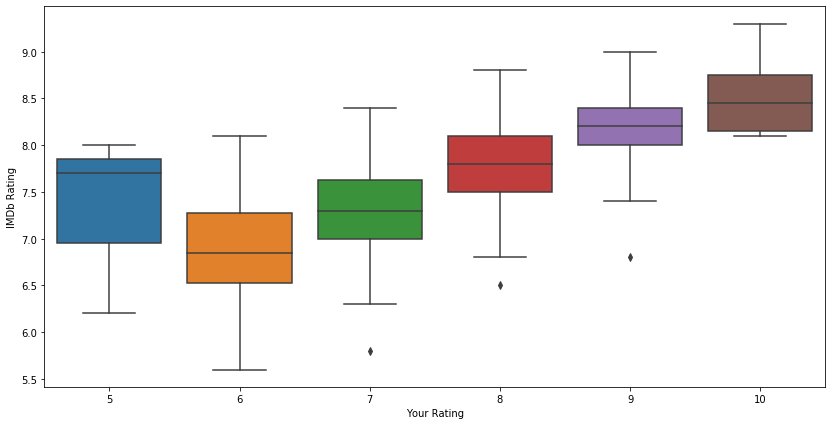

In [151]:
plt.figure(figsize=(14,7))
sns.boxplot(x = 'Your Rating', y = 'IMDb Rating', data = data_film)
#sns.boxplot(x = 'IMDb Rating', data = data_film, color = 'gray')

#### Insight: I generally follow the same tresnds as the IMDb ratings. The movies I've rated the highest tend to be highly rated movies in general. There is a large percentage of movies I've rated lower that the IMDb public likes.

#### Lets just plot the features and try and find clusters.

Text(0, 0.5, 'Rating')

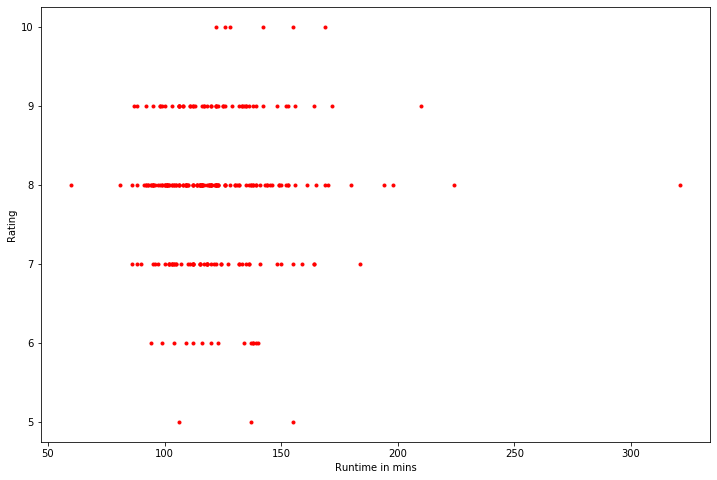

In [22]:
plt.figure(figsize=(12,8))
plt.plot( data_film['Runtime (mins)'], data_film['Your Rating'].to_list(), 'r.')
plt.xlabel('Runtime in mins')
plt.ylabel('Rating')

In [204]:
data_film.dtypes

Your Rating                              int64
Title                                   object
URL                                     object
Title Type                              object
IMDb Rating                            float64
Runtime (mins)                           int64
Year                                     int64
Num Votes                                int64
Genre:_Action                            uint8
Genre:_Adventure                         uint8
Genre:_Animation                         uint8
Genre:_Biography                         uint8
Genre:_Comedy                            uint8
Genre:_Crime                             uint8
Genre:_Documentary                       uint8
Genre:_Drama                             uint8
Genre:_Family                            uint8
Genre:_Horror                            uint8
Genre:_Mystery                           uint8
Genre:_Sci-Fi                            uint8
Director:_Aamir Khan                     uint8
Director:_Abh

In [ ]:
# Dropping Rated and Release month and day, could have information, like I like rating movies higher on weekends etc?

In [197]:
data_film[['Rated_Year', 'Rated_month', 'Rated_Day']] = data_film['Date Rated'].str.split('-', expand = True)
data_film.drop(['Rated_month', 'Rated_Day'], axis = 1, inplace = True)

In [198]:
#data_film.rename({'Year': 'Rated_Year'}, axis=1, inplace=True)
data_film.drop('Date Rated', axis = 1, inplace = True)

In [200]:
data_film[['Release_Year', 'Release_month', 'Release_Day']] = data_film['Release Date'].str.split('-', expand = True)
data_film.drop(['Release_month', 'Release_Day'], axis = 1, inplace = True)

In [203]:
data_film.drop('Release Date', axis = 1, inplace = True)

In [207]:
data_film.drop(['Title Type', 'URL'], axis = 1, inplace = True)

### Making Copy as we'll drop Title and convert to numeric

In [208]:
data_film_num = data_film

In [209]:
data_film_num.drop(['Title'], axis = 1, inplace=True)

In [220]:
data_film_num.drop(['Release_Year'], axis = 1, inplace=True)

In [222]:
data_film_num['Rated_Year'] = data_film_num['Rated_Year'].astype(int)

#### Checking Out this New Info

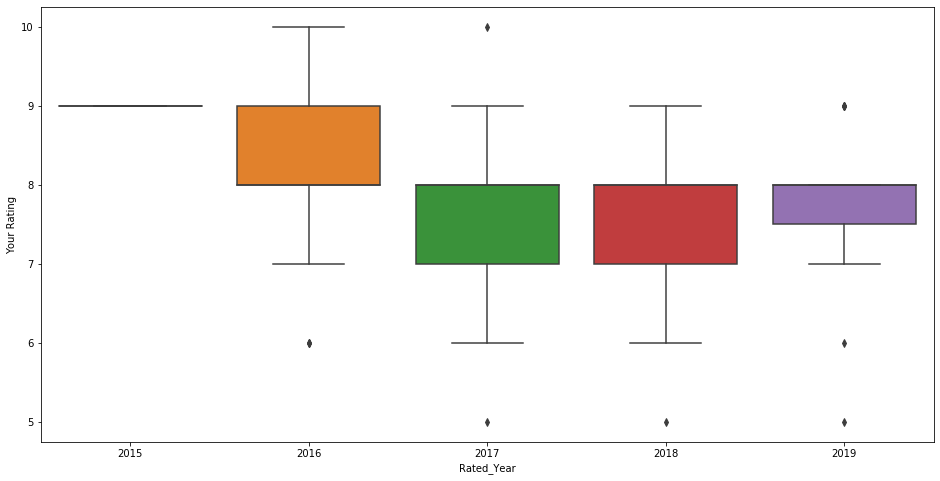

In [228]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'Rated_Year', y = 'Your Rating', data =data_film_num )

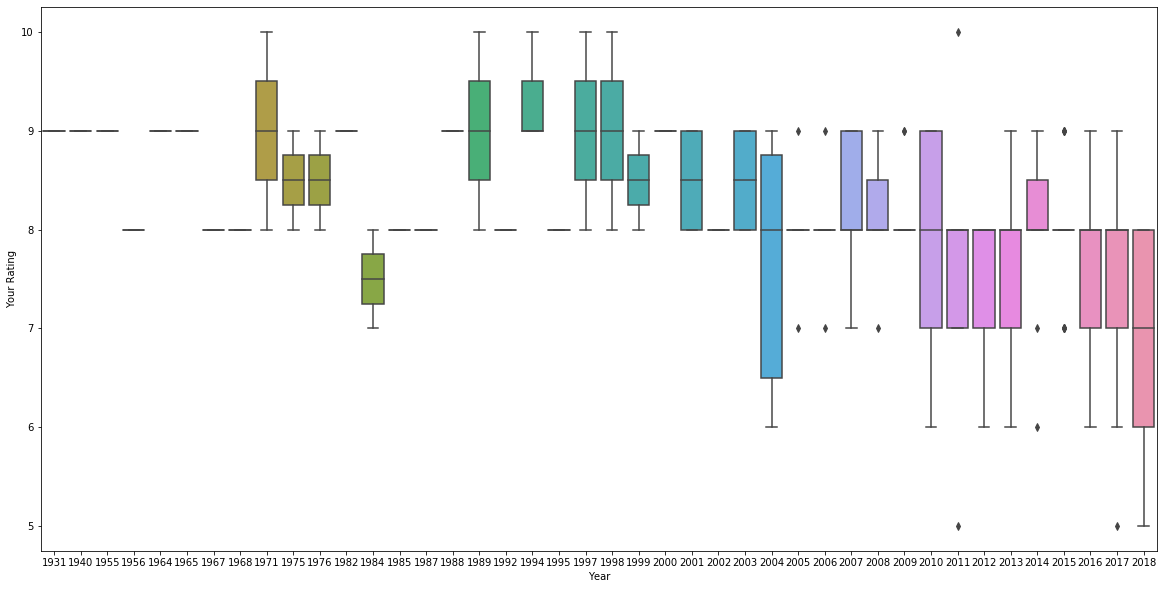

In [233]:
plt.figure(figsize=(20,10))
sns.boxplot(x = 'Year', y = 'Your Rating', data =data_film_num )

### Lets standardise these Values

In [152]:
from sklearn.preprocessing import StandardScaler

In [234]:
data_film_scaled = StandardScaler().fit_transform(data_film_num.values)

### Restoring Indexes And Column Names

In [238]:
data_film_scaled_df = pd.DataFrame(data = data_film_scaled, index = data_film_num.index, columns = data_film_num.columns)

# Principal Components Analysis to Reduce Dimensionality of Data

#### Lets Target that 50% Percent of the Variance is explained by the principal components

In [1]:
from sklearn.decomposition import PCA

target_variance = 0.50

for i in range(len(data_film_scaled_df.columns)):
    pca_film = PCA(n_components=i)
    pca_components_film = pca_film.fit_transform(data_film_scaled_df)
    #print(f'Total Explained Variance is {np.sum(pca_film.explained_variance_ratio_)}')
    if np.sum(pca_film.explained_variance_ratio_) > target_variance:
        #print(f'No of Components that explain 50% of Variance: {i}')
        break

print(f'No of Components that explain 50% of Variance: {i}')

NameError: name 'data_film_scaled_df' is not defined

### Getting the features for the clustering (using Runtime and My Ratings)
Coverting DF to dict, and using the given helper function.

In [23]:
film_dict = data_film.to_dict()

In [24]:
film_dict.keys()

dict_keys(['Const', 'Your Rating', 'Date Rated', 'Title', 'URL', 'Title Type', 'IMDb Rating', 'Runtime (mins)', 'Year', 'Genres', 'Num Votes', 'Release Date', 'Directors'])

In [25]:
feature_1 = 'Runtime (mins)'
feature_2 = 'Your Rating'
feature_3 = 'Year'
feature_4 = 'IMDb Rating'
feature_5 = 'Num Votes'
# poi is supposed to be target for helper, here dummy column

poi = 'Const'

# Ge list 2D array of rows with the features - [[feature_1, feature_2]]

In [26]:
# Adding all film runtimes to list, sure there is a better way.
run_time = []
for i in film_dict[feature_1]:
    run_time.append(film_dict[feature_1][i])

In [27]:
# Adding all your ratings to list, sure there is a better way.

y_rating = []
for i in film_dict[feature_2]:
    y_rating.append(film_dict[feature_2][i])

In [28]:
# year to list 

year = []
for i in film_dict[feature_3]:
    year.append(film_dict[feature_3][i])

In [29]:
# IMDb Rating to list 

imdb_rate = []
for i in film_dict[feature_4]:
    imdb_rate.append(film_dict[feature_4][i])

In [30]:
# Num of votes to list 

num_votes = []

for i in film_dict[feature_5]:
    num_votes.append(film_dict[feature_5][i])

In [31]:
# Convert to numpy arrays and vstack or concatenate.

run_arr = np.array(run_time)
rat_arr = np.array(y_rating)
year_arr = np.array(year)
imdb_rat_arr = np.array(imdb_rate)
num_votes_arr = np.array(num_votes)

In [32]:
run_arr = run_arr.reshape(-1,1)
rat_arr = rat_arr.reshape(-1,1)
year_arr = year_arr.reshape(-1,1)
imdb_rat_arr = imdb_rat_arr.reshape(-1,1)
num_votes_arr = num_votes_arr.reshape(-1,1)

In [33]:
# hstack to get rows with arrays of [feat 1, feat 2].
movie_features = np.hstack((run_arr, rat_arr, year_arr, imdb_rat_arr, num_votes_arr))

# convert to list of arrays for compatibility with helper function
movie_features_list = list(movie_features)

# Fitting Kmeans - Clustering algo.
1. Scale features first.

## Difficult to Interpret with Runtime and YourRating.
# TO DO:
1. Let's see if changing order of features, affects the clusters (shouldn't since its scaled ?) <b> (No Difference)</b>
2. Add Year feature to the mix.(Now we're Getting interesting Results). 
The clusters are split into : 1 - Highly rated, 3 - moderately rated a low rated movies clusters. <br>
Of the 3 moderately rated clusters, 1- is a cluster of older movies. The rest of the two are look to be seprated based on no. of votes. (not sure.)
3. Lets add more numerical features.( IMDb Rating - can get cluster of movies showing vastly different tastes)(Num Votes to get popularity in the mix.
)

In [150]:
#data_film.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, tt1010048 to tt0993846
Columns: 211 entries, Your Rating to Director:_Zoya Akhtar
dtypes: float64(1), int64(4), object(5), uint8(201)
memory usage: 80.6+ KB


In [35]:
from sklearn.preprocessing import MinMaxScaler

# Transforming to scaled features
scaled_mov_features = MinMaxScaler().fit_transform(movie_features_list)

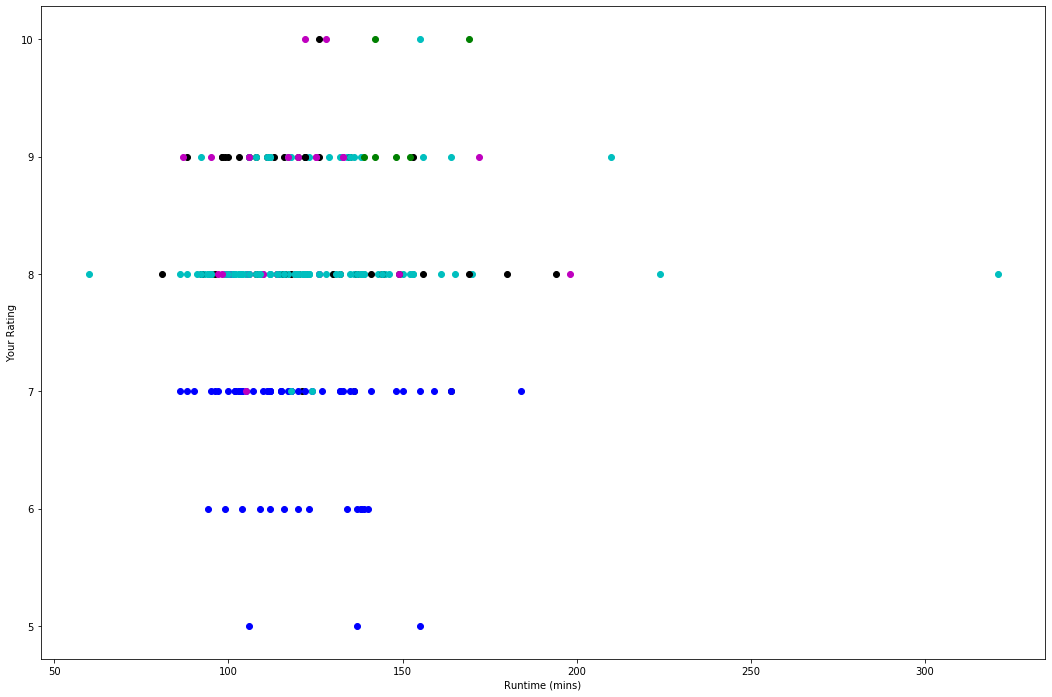

In [36]:
from sklearn.cluster import KMeans

cluster_film = KMeans(n_clusters = 5, n_init=10, max_iter= 100).fit(scaled_mov_features)

pred_film = cluster_film.labels_

plt.figure(figsize=(18,12))

try:
    Draw(pred_film, movie_features_list, poi, mark_poi=False, name="Filmclusters_rating_year_runtime_imdb_numVotes.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")

In [37]:
# Lets get the center of the clusters 
print('Runtime', 'Your Rating','Year','IMDb Rating','Num Votes')
# 5 dimensions for each cluster.
print(cluster_film.cluster_centers_)

Runtime Your Rating Year IMDb Rating Num Votes
[[0.22824302 0.33968254 0.95548258 0.4036894  0.07470704]
 [0.23674829 0.63304348 0.92693653 0.57884841 0.08923739]
 [0.24172762 0.67272727 0.87748171 0.69287469 0.37107101]
 [0.2344131  0.71818182 0.45872518 0.67813268 0.14139224]
 [0.33971903 0.86666667 0.79885057 0.88738739 0.82546931]]


### The splits are still Mostly on the basis of ratings.

### Lets Place the cluster labels back into dataframe and check which Movies got Clustered Together.

In [38]:
data_film['Clusters'] = pred_film

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Investigating Clusters

### The splits are still Mostly on the basis of ratings.

In [39]:
data_film.groupby(['Clusters'])['Your Rating'].size()

Clusters
0     63
1    115
2     44
3     22
4      6
Name: Your Rating, dtype: int64

In [40]:
data_film.groupby(['Clusters'])['Your Rating'].mean()
# A group of movies that is highly rated and a group with low ratings.
# Lets investigate these groups 

Clusters
0    6.698413
1    8.165217
2    8.363636
3    8.590909
4    9.333333
Name: Your Rating, dtype: float64

In [41]:
data_film.groupby(['Clusters'])['Your Rating'].describe()
# Low standard Deviation in ratings, so, probably has clustered some sort of relationship.

,count,mean,std,min,25%,50%,75%,max
Clusters,,,,,,,,
0,63.0,6.698413,0.585715,5.0,6.0,7.0,7.00,8.0
1,115.0,8.165217,0.457500,7.0,8.0,8.0,8.00,10.0
2,44.0,8.363636,0.650256,7.0,8.0,8.0,9.00,10.0
3,22.0,8.590909,0.734140,7.0,8.0,9.0,9.00,10.0
4,6.0,9.333333,0.516398,9.0,9.0,9.0,9.75,10.0


In [42]:
# Lets try and visualize the groups 

grouped_df = data_film.groupby(['Clusters'])

clust_0 = grouped_df.get_group(0)
clust_1 = grouped_df.get_group(1)
clust_2 = grouped_df.get_group(2)
clust_3 = grouped_df.get_group(3)
clust_4 = grouped_df.get_group(4)

In [43]:
clust_3.head(10)

,Const,Your Rating,Date Rated,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Clusters
94,tt0021749,9,2018-12-26,City Lights,https://www.imdb.com/title/tt0021749/,movie,8.5,87,1931,"Comedy, Drama, Romance",141725,1931-01-30,Charles Chaplin,3
141,tt0032553,9,2016-04-27,The Great Dictator,https://www.imdb.com/title/tt0032553/,movie,8.5,125,1940,"Comedy, Drama, War",175008,1940-10-15,Charles Chaplin,3
212,tt0048473,9,2016-09-01,Pather Panchali,https://www.imdb.com/title/tt0048473/,movie,8.5,125,1955,Drama,18525,1955-08-26,Satyajit Ray,3
215,tt0048956,8,2018-12-24,Aparajito,https://www.imdb.com/title/tt0048956/,movie,8.2,110,1956,Drama,9241,1956-10-11,Satyajit Ray,3
231,tt0057012,9,2019-01-08,Dr. Strangelove or: How I Learned to Stop Worr...,https://www.imdb.com/title/tt0057012/,movie,8.4,95,1964,Comedy,405988,1964-01-29,Stanley Kubrick,3
237,tt0059742,9,2016-08-20,The Sound of Music,https://www.imdb.com/title/tt0059742/,movie,8.0,172,1965,"Biography, Drama, Family, Musical, Romance",177591,1965-03-02,Robert Wise,3
241,tt0061722,8,2017-02-08,The Graduate,https://www.imdb.com/title/tt0061722/,movie,8.0,106,1967,"Comedy, Drama, Romance",234011,1967-12-21,Mike Nichols,3
243,tt0062622,8,2016-04-27,2001: A Space Odyssey,https://www.imdb.com/title/tt0062622/,movie,8.3,149,1968,"Adventure, Sci-Fi",527162,1968-04-02,Stanley Kubrick,3
249,tt0066763,10,2016-09-01,Anand,https://www.imdb.com/title/tt0066763/,movie,8.8,122,1971,Drama,21909,1971-03-12,Hrishikesh Mukherjee,3
250,tt0067334,9,2017-04-01,Le Mans,https://www.imdb.com/title/tt0067334/,movie,6.8,106,1971,"Action, Adventure, Drama, Sport",7718,1971-06-23,Lee H. Katzin,3


#### 1 Sample T-Test to compare population your rating and cluster your rating.

In [66]:
# Lets perform 1 sample t test between population your rating (data_film) and sample clust_0
from scipy.stats import ttest_1samp

pop_film = data_film['Your Rating'].tolist()
print(np.mean(pop_film), len(pop_film))

clust_3_sample = clust_3['Your Rating'].tolist()
print(np.mean(clust_3_sample), len(clust_3_sample))

tstat, pvalue = ttest_1samp(clust_3_sample, np.mean(pop_film))
print('\n T-Stat for hypothesis test {} and P-value {}'.format(tstat, pvalue))
print('T-critical for n = {}, alpha = 0.05 is'.format(len(clust_3_sample)-1))
if pvalue<0.05:
    print('Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant')

7.896 250
8.590909090909092 22

 T-Stat for hypothesis test 4.439771794851792 and P-value 0.00022703454144251792
T-critical for n = 21, alpha = 0.05 is
Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant


#### 2 Sample T-Test for independent sample to compare your rating from two clusters.

In [76]:
from scipy.stats import ttest_ind

In [77]:
clust_2_sample = clust_2['Your Rating'].tolist()
clust_3_sample = clust_3['Your Rating'].tolist()

In [78]:
tstat, pvalue = ttest_ind(clust_2_sample, clust_3_sample)

In [83]:
from scipy.stats import t

In [81]:
print('Sample means 1: {}, 2: {}'.format(np.mean(clust_2_sample), np.mean(clust_3_sample)))
print('\nT-Stat for hypothesis test {} and P-value {}'.format(tstat, pvalue))
print('T-critical for Degrees of freedom = {}, alpha = 0.05 is'.format(len(clust_2_sample) + len(clust_3_sample) - 2, t.ppf()))
if pvalue<0.05:
    print('Statisttically significant result, but have read that with large enough sample size, most differences are statistically significant.')
else:
    print('Difference not statistically different.')

Sample means 1: 8.363636363636363, 2: 8.590909090909092

T-Stat for hypothesis test -1.2820117729284253 and P-value 0.2044631953357978
T-critical for Degrees of freedom = 64, alpha = 0.05 is
Difference not statistically different.


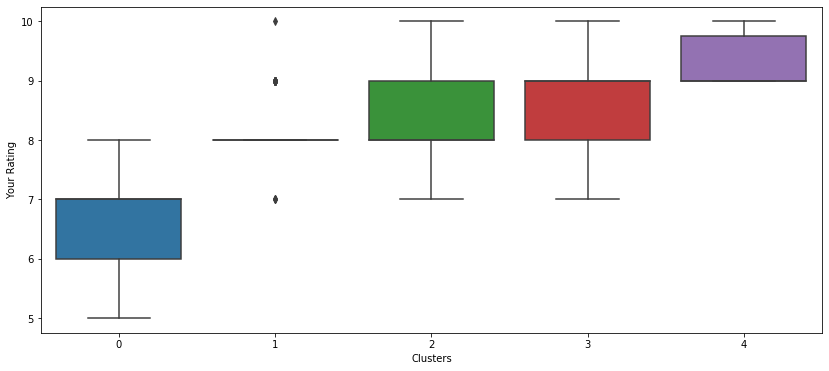

In [44]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Your Rating', data = data_film)

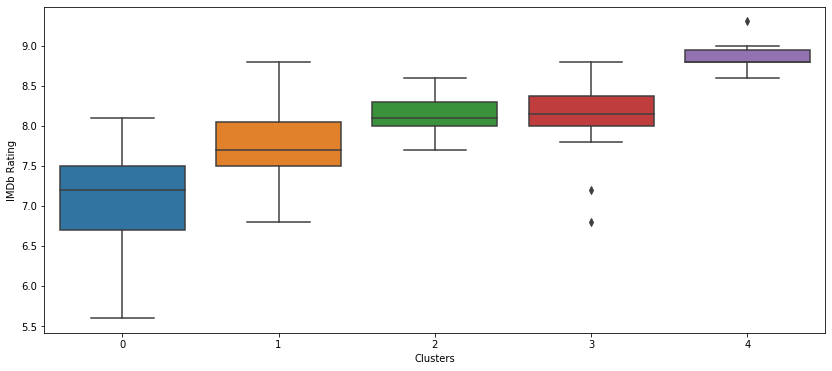

In [45]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'IMDb Rating', data = data_film)

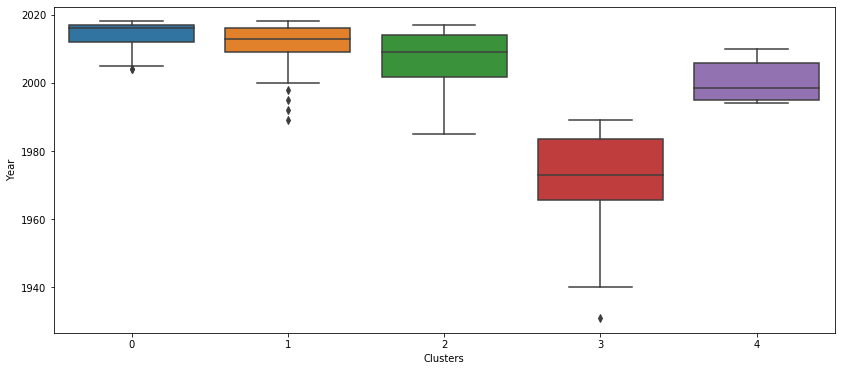

In [46]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Year', data = data_film)

#### Insight: I tend to rate newer movies lower that tend to have higher IMDb scores due to recency bias.

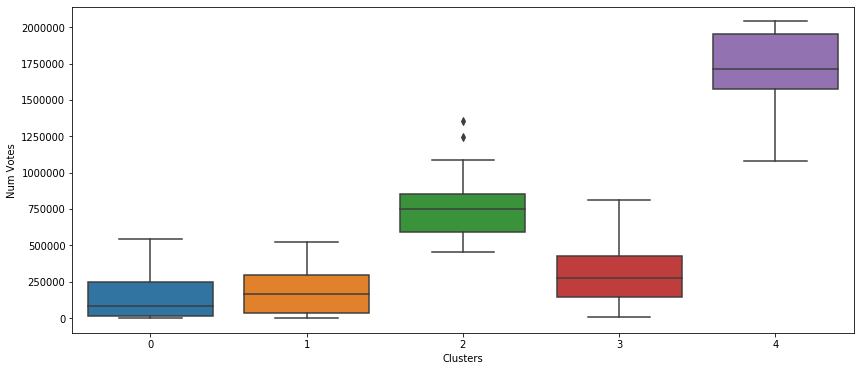

In [47]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'Clusters', y = 'Num Votes', data = data_film)